In [25]:
%matplotlib inline

In [27]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
import plotly.graph_objects as go
import plotly.express as px

# Extract: Reading the Data

In [3]:
# Read your CSV file
file_to_load = 'dataset/vehicles.csv'

In [4]:
# Convert the file into a pandas DataFrame and analyze the first 5 values
used_cars = pd.read_csv(file_to_load)
used_cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
# Analyze the last 5 values
used_cars.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [6]:
used_cars.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

<AxesSubplot:>

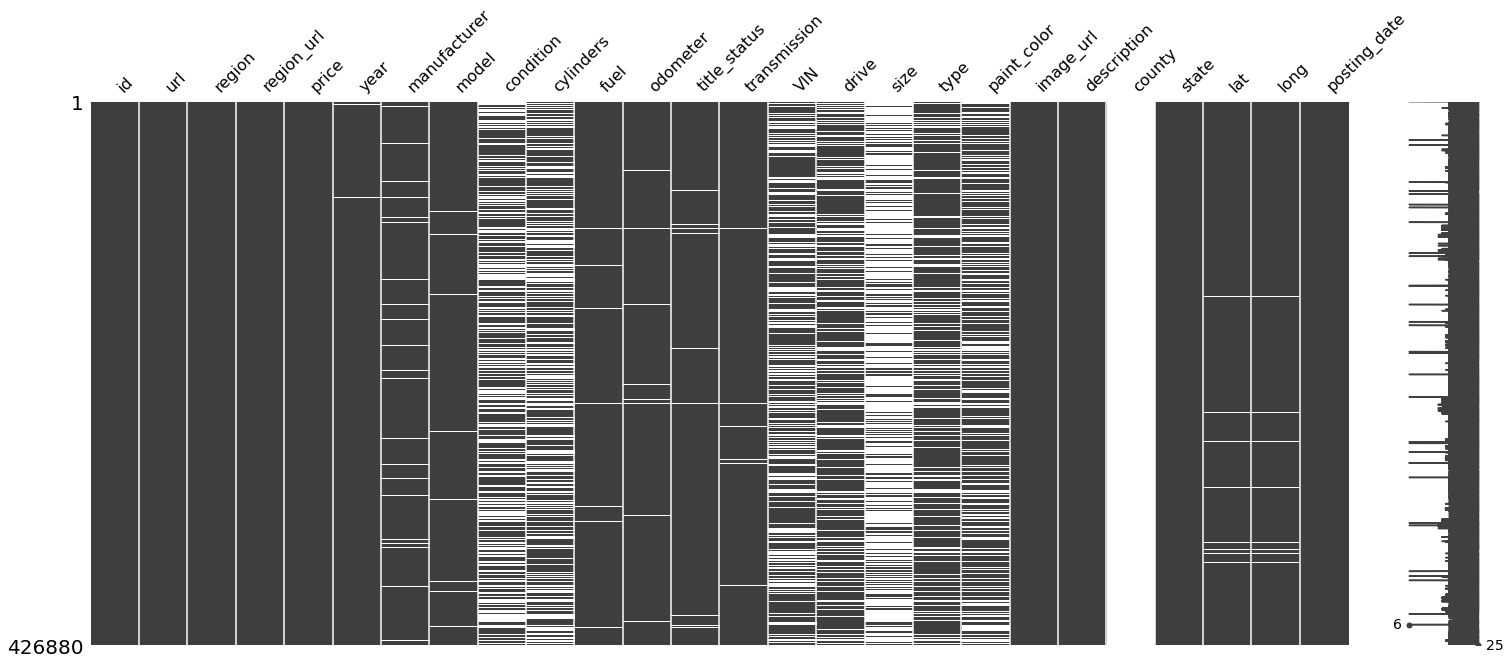

In [7]:
msng.matrix(used_cars)

Visualizing the dataset this way we can make multiple observations for our **Transform** step:
1. The clearest one would be that the first step is dropping the "county" column given that it doesn't have any data, therefore doesn't provide any value.
2. The next columns that we need to explore considering data quality are:
    - condition
    - cylinders
    - VIN
    - size
3. We can keep the id column, not for Data Analysis purposes, but to be able to, in case is neccesary, locate a vehicle we would like to inspect into detail and this way, we are going to be able to drop unneccesary columns for the analysis:
    - url
    - region_url
    - image_url
    - description
    - VIN

# Transform: Data Cleaning

First, let's take care of the columns that serve no purpose for our analysis:

In [22]:
used_cars_df = used_cars.drop(columns = ['url', 'region_url', 'image_url', 'VIN', 'county', 'size', 'description'])

Now, to consolidate our data further, the main variables that we want to analyze with NaNs are:
- Year
- Condition
- Model
- Manufacturer

Therefore, for data cleaning, the strategy chosen is to drop any null values within those columns.

In [23]:
used_cars_df_nonull = used_cars_df.dropna(subset = ['year', 'condition', 'model', 'manufacturer'])

Exploring our data once more, we now see that our DataFrame has way fewer missing points thay could affect our statistics, correlations and metrics.

<AxesSubplot:>

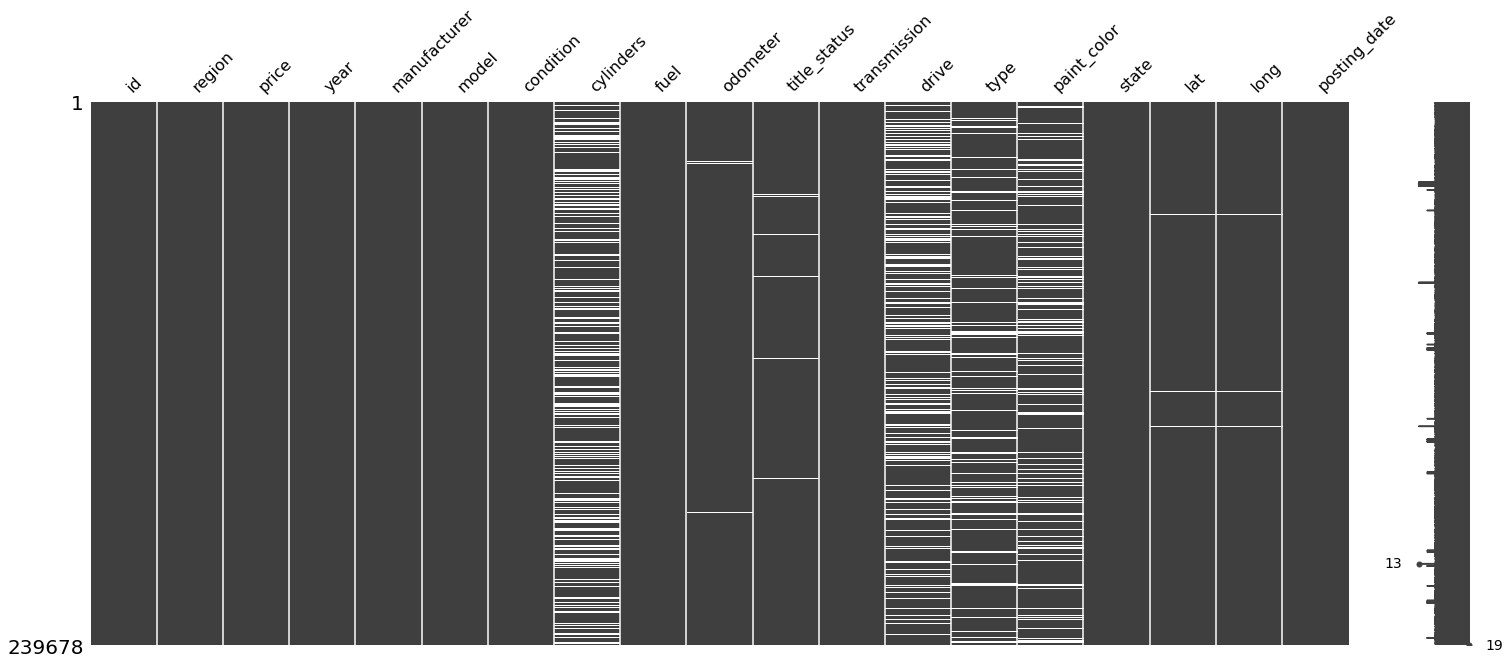

In [24]:
msng.matrix(used_cars_df_nonull)

In [20]:
used_cars_df_nonull.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03T14:02:03-0500


Now, for manufacturers, we need to confirm that there are no similar names that are not grouped correctly.

In [21]:
used_cars_df_nonull['manufacturer'].value_counts()

ford               37467
chevrolet          32148
toyota             20490
honda              12841
nissan             11020
jeep               10442
gmc                 9373
bmw                 9146
ram                 7994
dodge               7563
mercedes-benz       6685
volkswagen          6241
hyundai             6009
subaru              5536
lexus               5289
audi                5231
kia                 4928
cadillac            4490
acura               4479
chrysler            3643
buick               3633
mazda               3603
infiniti            3543
lincoln             3047
volvo               2459
mitsubishi          2321
mini                1594
jaguar              1550
pontiac             1468
rover               1049
mercury              824
alfa-romeo           751
porsche              728
saturn               686
tesla                667
fiat                 564
harley-davidson       74
ferrari               40
datsun                40
aston-martin          12


In [ ]:
# Year

# Manufacturer

In [30]:
make = used_cars_df_nonull['manufacturer'].tolist()

In [35]:
ford_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'ford']
chevrolet_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'chevrolet']
toyota_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'toyota']
honda_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'honda']
nissan_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'nissan']
jeep_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'jeep']
gmc_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'gmc']
bmw_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'bmw']
ram_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'ram']
dodge_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'dodge']
mercedes_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'mercedes-benz']
vw_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'volkswagen']
audi_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'audi']
kia_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'kia']
chrysler_df = used_cars_df_nonull[used_cars_df_nonull['manufacturer'] == 'chrysler']

<AxesSubplot:xlabel='count', ylabel='manufacturer'>

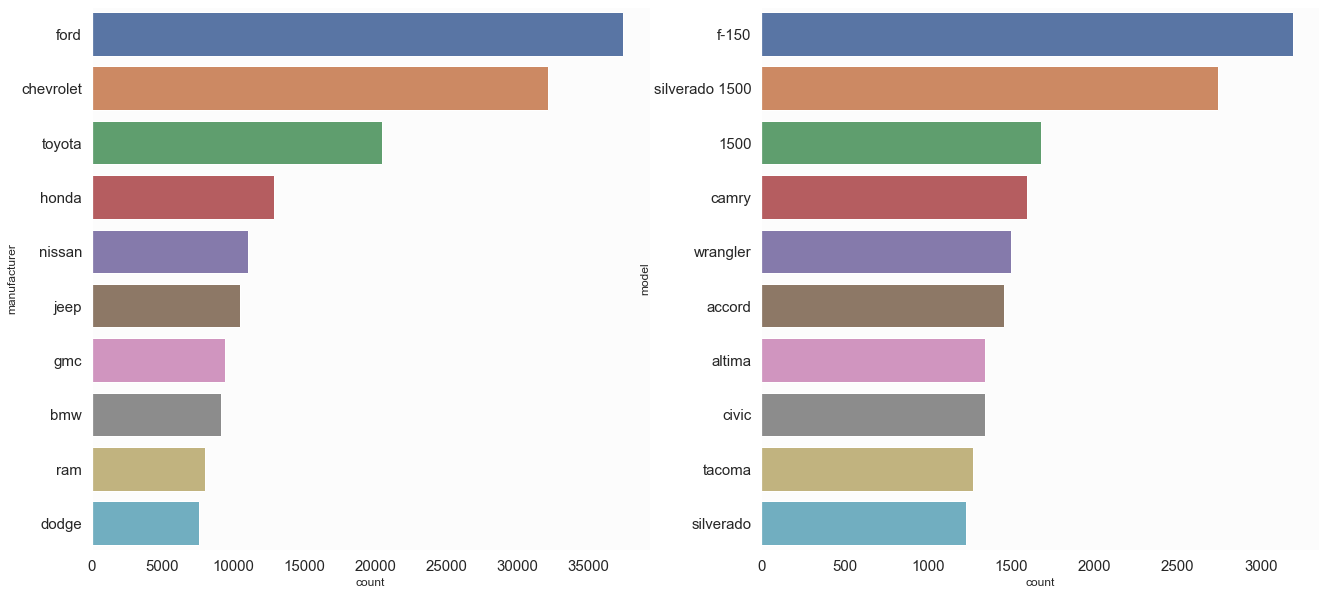

In [60]:
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':13})
sns.countplot(y ='model',data = used_cars_df_nonull,order=used_cars_df_nonull.model.value_counts().iloc[:10].index, ax = ax[1]) 
sns.countplot(y ='manufacturer',data = used_cars_df_nonull,order=used_cars_df_nonull.manufacturer.value_counts().iloc[:10].index, ax= ax[0])

<AxesSubplot:xlabel='transmission', ylabel='count'>

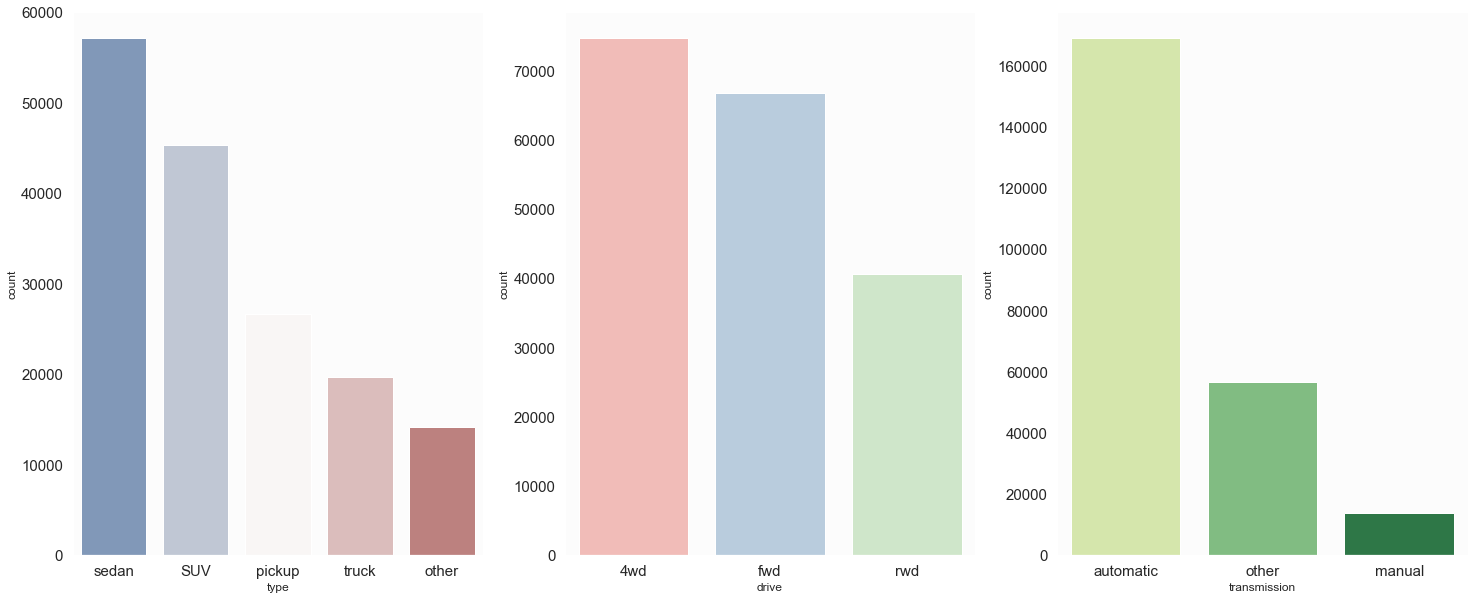

In [59]:
fig, ax =plt.subplots(1,3, figsize=(25, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='type',data = used_cars_df_nonull,order=used_cars_df_nonull.type.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='drive',data = used_cars_df_nonull,order=used_cars_df_nonull.drive.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='transmission',data = used_cars_df_nonull,order=used_cars_df_nonull.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")

In [ ]:
model = ford_df['model'].value_counts()
ford_model = model.iloc[0:10]
df1 = ford_model.to_frame()
df1['manufacturer'] = 'ford'

model = chevrolet_df['model'].value_counts()
chevrolet_model = model.iloc[0:10]
df2 = chevrolet_model.to_frame()
df2['manufacturer'] = 'chevrolet'

model = toyota_df['model'].value_counts()
toyota_model = model.iloc[0:10]
df3 = toyota_model.to_frame()
df3['manufacturer'] = 'toyota'

model = honda_df['model'].value_counts()
honda_model = model.iloc[0:10]
df4 = honda_model.to_frame()
df4['manufacturer'] = 'honda'

model = nissan_df['model'].value_counts()
nissan_model = model.iloc[0:10]
df4 = nissan_model.to_frame()
df4['manufacturer'] = 'nissan'

model = jeep_df['model'].value_counts()
jeep_model = model.iloc[0:10]
df5 = jeep_model.to_frame()
df6['manufacturer'] = 'jeep'

model = gmc_df['model'].value_counts()
gmc_model = model.iloc[0:10]
df7 = gmc_model.to_frame()
df7['manufacturer'] = 'gmc'

model = bmw_df['model'].value_counts()
bmw_model = model.iloc[0:10]
df8 = bmw_model.to_frame()
df8['manufacturer'] = 'bmw'

model = ram_df['model'].value_counts()
ram_model = model.iloc[0:10]
df8 = ram_model.to_frame()
df8['manufacturer'] = 'ram'